In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for visualiation

gunsales_population = pd.read_csv('./data/gunsales_population.csv')

In [2]:
gunsales_population.head()

,Unnamed: 0,year,state,population,admin,handgun,long_gun,month,multiple,other,permit,totals
0,0,2013,United States,316234505.0,267.0,881038.0,788328.0,1,31029.0,26137.0,693076.0,2483230.0
1,1,2013,United States,316234505.0,375.0,770872.0,703223.0,2,31163.0,22709.0,664252.0,2298561.0
2,2,2013,United States,316234505.0,376.0,683266.0,700873.0,3,23878.0,23817.0,695386.0,2197116.0
3,3,2013,United States,316234505.0,665.0,533674.0,554003.0,4,18624.0,21136.0,517224.0,1702455.0
4,4,2013,United States,316234505.0,619.0,445522.0,436674.0,5,16057.0,15605.0,449993.0,1424450.0


In [3]:
gunsales_population.columns

Index(['Unnamed: 0', 'year', 'state', 'population', 'admin', 'handgun',
       'long_gun', 'month', 'multiple', 'other', 'permit', 'totals'],
      dtype='object')

In [16]:
# I wanted to compare the United States totals to the actual totals, just to make sure.

united_states_totals = gunsales_population[gunsales_population.state ==  "United States"]
united_states_totals.head()

,Unnamed: 0,year,state,population,admin,handgun,long_gun,month,multiple,other,permit,totals
0,0,2013,United States,316234505.0,267.0,881038.0,788328.0,1,31029.0,26137.0,693076.0,2483230.0
1,1,2013,United States,316234505.0,375.0,770872.0,703223.0,2,31163.0,22709.0,664252.0,2298561.0
2,2,2013,United States,316234505.0,376.0,683266.0,700873.0,3,23878.0,23817.0,695386.0,2197116.0
3,3,2013,United States,316234505.0,665.0,533674.0,554003.0,4,18624.0,21136.0,517224.0,1702455.0
4,4,2013,United States,316234505.0,619.0,445522.0,436674.0,5,16057.0,15605.0,449993.0,1424450.0


In [5]:
# Grouped the non 'United States' columns by year then month and totaled their population, totals, etc.

only_states = gunsales_population[gunsales_population.state != "United States"]
only_states.groupby([(gunsales_population.year),(gunsales_population.month)])[
    ["population",'admin','handgun','admin',"totals"]].sum().head()

population  admin   handgun  admin     totals
year month                                                
2013 1      316234505.0  267.0  879862.0  267.0  2481714.0
     2      316234505.0  375.0  769808.0  375.0  2297200.0
     3      316234505.0  375.0  682225.0  375.0  2195530.0
     4      316234505.0  665.0  532508.0  665.0  1700943.0
     5      316234505.0  619.0  444155.0  619.0  1422686.0

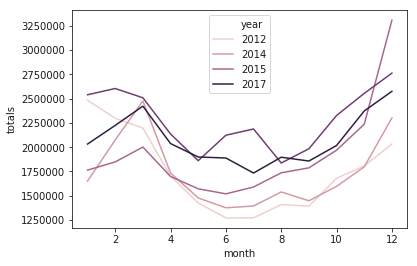

In [25]:
sns.set_palette("dark")

# Requires seaborn 9.0
# install seaborn==0.9.0

sns.lineplot(x="month", y="totals",
             hue="year", 
             data=united_states_totals)

# Style works to show all years but hue doesn't... Any advice regarding this would be helpful

# Because these are government issued, could the request times and times these are issued differ?
# Or is this simply seasonality.